In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import timeit

In [2]:
# Implement CUBE Algorithm
# Input: data array = {p1,p2,... pn}; k: ouput size
# Output: subset S of size k
def CUBE(data, k):
    """
    :Input:
     - *data* (numpy.ndarray) Our data, which is a set of d-dimensional points {p1,p2,...,pn}
     - *k* (int) The desired output size
    :Output:
     - *result_set* (numpy.ndarray) A subset of data of size k
    """
    
    # map a d-tuple (each dimension 0, ... , t-1) to index, like d digit of base t
    def tuple_2_index(tupl,t): 
        result = 0
        d = len(tupl)
        for i in range(d):
            result += tupl[i] * t ** (d-1-i)
        return int(result)
    
    # init parameters
    n = data.shape[0]
    d = data.shape[1] # dimension 
    t = np.floor((k - d + 1)**(1 /(d - 1))) # num of buckets in each dimension
    t = int(t)
    
    S = np.array([]) # contain indices of selected points
    max_index = np.argmax(data, axis=0)
    max_val = np.amax(data, axis=0) 
    
    # Step 1: add max point in first d-1 dimensions
    for i in range(d - 1): # process first p-1 dimensions
        # find point reaching max in each coordinate
        S = np.append(S,max_index[i]) 
    S = np.unique(S) # eliminate duplicate points
    
    # Step 2: bucket division
    # assign d-simensional index to each point according to bucket
    index = np.empty([n,d-1]) # for each point, the bucket is represented by a d-tuple
    
    # assign index to each point
    for i in range(n):
        for dim in range(d-1):
            c_d = max_val[dim]
            index[i,dim] = int(np.ceil(data[i,dim] / (c_d / t)) - 1)
            
    # create mapping from d-tuple (bucket) to array of indices (points inside)
    num_of_buckets = t ** (d-1)
    
    # tuple_2_indices contain all mapping from index of bucket to indices of points
    tuple_2_indices = [] # mapping: each row -- tuple, index_arr
    for bucket_index in range(num_of_buckets):
        tuple_2_indices.append([bucket_index,[]]) # init each bucket to empty array
    
    for i in range(n):
        bucket_index = tuple_2_index(index[i], t)
        #print("point %s in bucket %s" %(i,bucket_index))
        tuple_2_indices[bucket_index][1].append(i) 
    
    for bucket_index in range(num_of_buckets):
        d_max = 0
        max_index = -1
        # loop through all points in bucket, take max in dimension d
        for i in tuple_2_indices[bucket_index][1]: 
            if data[i][d-1] >= d_max:
                d_max = data[i][d-1]
                max_index = i
        if max_index >= 0: # went through loop, bucket not empty
            S = np.append(S,max_index)
            S = np.unique(S)
    S = S.astype(int)
    
    result_set = np.empty([S.shape[0],d])
    for i, index in enumerate(S):
        result_set[i] = data[index]
    return result_set

In [3]:
# Process Input: data stored in array data
data = np.genfromtxt('Pokemon.csv',delimiter=",")
data = np.delete(data, 0, 1)
data_6D = np.delete(data, 0, 1)
data_5D = np.delete(data_6D, 0, 1)
data_4D = np.delete(data_5D, 0, 1)
data_3D = np.delete(data_4D, 0, 1)
data_2D = np.delete(data_3D, 0, 1)
max_index = np.argmax(data, axis=0)
max_val = np.amax(data, axis=0) 
test_data = data_2D[0:50,:]
print(test_data.shape)

(50, 2)


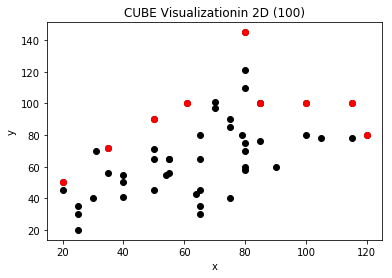

In [9]:
# 100
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
S = CUBE(test_data, 10)

# plot
axes.plot(test_data[:,0], test_data[:,1], 'ko')
axes.plot(S[:,0], S[:,1], 'ro')
axes.set_title("CUBE Visualizationin 2D (100)")
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()